# HW 7


## Name: Reem Almijmaj
## Github Username: reemabdullah888
## USC ID: 3217747723

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import statistics
from statistics import stdev
from statistics import mean
from scipy.spatial import distance
from sklearn.metrics import hamming_loss
# !pip install beautifultable
import warnings
warnings.filterwarnings('ignore')

**Question 1. Multi-class and Multi-Label Classification Using Support Vector Machines**

(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
# read data into pandas dataframe

data = pd.read_csv('../data/Frogs_MFCCs.csv')
display(data)

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

In [13]:
#preprocessing

# remove unused column
data = data.drop(columns = 'RecordID')

x_labels = []
# list of y labels from column names
y_labels = ['Family','Genus','Species']

# append x label columns to list
for label in data.columns:
    if label not in y_labels:
        x_labels.append(label)


In [29]:
#create training set 
X = data.iloc[:,:22]
# display(X)
y = data.iloc[:,22:25]

# split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[x_labels], data[y_labels], test_size=0.3, random_state = 42)

(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a 
classifier for each label (binary relevance). We first try this approach:

*i. Research exact match and hamming score / loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.*

Exact match: Defines the subset accuracy and indicates the percentage of samples that have all their labels classified correctly, disadvantage of this measure is that multi-class classification problems have a chance of being partially correct, but here we ignore those partially correct matches. In other words, if the entire set of predicted labels for a sample strictly match the actual set of labels, then the subset accuracy will be 1.0, otherwise it is 0.0. <br> 
<br>
Hamming loss:is the fraction of incorrect labels to total labels. [the fraction of labels that are incorrectly predicted]. Hamming loss computes the average hamming distance between two set of samples. It is the fraction of observations for which labels are not predicted properly. In other words, if an observation has 3 labels, and 2 out of these 3 labels are not predicted correctly, then the hamming distance is 2.
<br>
Hamming Score:is the same as the exact match, it is the fraction of correct labels to incorrect labels.



# Resources: <br>
https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics


*ii.Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.*

In [31]:


y_pred={}
all_hamming_score={}
all_exact_match_score={}
for i in y_labels:
    parameters = {'kernel':['rbf'], 'C':[0.001,0.01,1,10,100,1000,10000,100000,1000000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]}
    model = SVC()
    clf = GridSearchCV(model, parameters,cv=10)
    clf.fit(X_train, y_train[[i]])
    #best parameter after tuy_labelsning
    print("The best parameters for {} :".format(i), '\n')
    print(clf.best_params_ , '\n')
    
    #How our model looks after hyper-parameter tuning
    print("The best estimators for {} :".format(i), '\n')
    print(clf.best_estimator_ , '\n')
    
    y_pred[i] = clf.predict(X_test)
    hamming_loss_value = hamming_loss(y_test[[i]].values.ravel(), y_pred[i])
    all_hamming_score[i]= hamming_loss_value
    
    exact_match_value= accuracy_score(y_test[[i]].values.ravel(),y_pred[i])
    all_exact_match_score[i]= exact_match_value
    print("The classification report for {} is".format(i),'\n', classification_report(y_test[[i]].values.ravel(), y_pred[i]))
    print("The hamming loss for {} is ".format(i), hamming_loss_value)
    print("The exact match score for {} is".format(i),exact_match_value )

The best parameters for Family : 

{'C': 10, 'gamma': 2, 'kernel': 'rbf'} 

The best estimators for Family : 

SVC(C=10, gamma=2) 

The classification report for Family is 
                  precision    recall  f1-score   support

      Bufonidae       1.00      0.89      0.94        27
  Dendrobatidae       0.99      1.00      1.00       162
        Hylidae       0.99      1.00      0.99       623
Leptodactylidae       1.00      0.99      1.00      1347

       accuracy                           0.99      2159
      macro avg       0.99      0.97      0.98      2159
   weighted avg       0.99      0.99      0.99      2159

The hamming loss for Family is  0.006021306160259379
The exact match score for Family is 0.9939786938397406
The best parameters for Genus : 

{'C': 100, 'gamma': 1.5, 'kernel': 'rbf'} 

The best estimators for Genus : 

SVC(C=100, gamma=1.5) 

The classification report for Genus is 
                precision    recall  f1-score   support

    Adenomera       1.00  

In [39]:
# calculating the average exact match score and avg hamming loss

Avg_HammingLoss_SVM = sum(all_hamming_score.values())/3


Avg_ExactMatch_SVM = sum(all_exact_match_score.values())/3


print('Average Hamming Score for SVM :', 1-Avg_HammingLoss_SVM)
print('Average Hamming Loss for SVM :', Avg_HammingLoss_SVM)
print('Average Exact Match Score for SVM :', Avg_ExactMatch_SVM)
print('Average Exact Match Loss for SVM :', 1- Avg_ExactMatch_SVM)

Average Hamming Score for SVM : 0.9916628068550255
Average Hamming Loss for SVM : 0.008337193144974525
Average Exact Match Score for SVM : 0.9916628068550254
Average Exact Match Loss for SVM : 0.008337193144974608


*iii.Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross vali-dation.*

In [24]:
#standardize attributes
scaler = StandardScaler()
scaler.fit(X_train)


X_train_s = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
display(X_train_s)
display(X_test_s)

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152650  0.003519 -0.113627  0.784358 -0.200077 -1.106064 -0.460771   
1     0.152650 -0.425788 -1.730997 -3.300931 -1.247680  1.314366  2.713662   
2    -0.303474  0.586027  2.605770  0.592614 -3.358105  1.742951  1.435300   
3     0.152650 -0.312156 -0.756501  0.504547  0.355322 -0.439906 -0.946771   
4     0.152650  0.340871  0.950464  0.822589 -1.582777 -1.288530  2.603894   
...        ...       ...       ...       ...       ...       ...       ...   
5031  0.152650  0.361313 -0.165758  1.616653  1.423667 -0.343010 -0.923692   
5032  0.152650  1.395238  1.068616 -0.275613 -0.767659 -0.487996 -0.360748   
5033  0.152650  1.948896  1.591318 -0.385189 -1.014289 -0.189666 -0.316792   
5034 -0.779656  1.358048  2.605770 -0.447759 -2.181215  1.899104  0.754608   
5035  0.152650  0.027634 -1.396264 -0.555557  2.356567  0.731818 -1.196245   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MFCCs_15  \
0     1.257761  0.937894 -1.401044  ...  1.392737 -0.718716 -0.844945   
1     2.243005 -1.689411 -2.671442  ... -1.256970  2.445364  2.011597   
2    -0.555779 -0.345921 -0.860185  ... -1.085333 -0.669404  1.415884   
3    -0.126135  0.369278 -0.295261  ...  1.229407 -0.236187 -1.168372   
4     0.570650 -2.549861  0.786700  ... -1.372063  1.524571  1.223935   
...        ...       ...       ...  ...       ...       ...       ...   
5031  0.562143  1.207108  0.944100  ...  1.101934  0.169858 -1.339970   
5032  1.074126 -0.135830 -2.211783  ... -1.836580 -1.554901  1.856271   
5033  1.577810  0.498396 -3.966554  ... -1.592290 -1.799112  1.521709   
5034 -0.801316  0.182232 -0.835100  ... -0.962106 -0.983331  1.093325   
5035 -1.195121  0.416316  1.479005  ... -0.893054  1.951825  1.466440   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
0     1.149412  0.938437 -0.599301 -0.945201 -0.386661  0.763875  0.841487  
1    -1.677197 -2.770201 -0.609333  0.476943  0.226740 -0.149397 -0.377184  
2    -0.419475 -1.006422 -0.730157  0.262610  0.888295 -0.211064 -1.566154  
3    -0.143824  1.003501  0.310414 -0.697276 -0.992017  0.087123  1.316269  
4    -1.597081 -0.668013  1.752018  0.401533 -0.015516  0.646985 -0.015540  
...        ...       ...       ...       ...       ...       ...       ...  
5031 -0.224733  0.956471  0.538005 -0.250381 -1.284427 -0.858549  0.813641  
5032  0.455824 -1.671754 -0.059405  0.672845  1.306545  0.150481 -2.166153  
5033 -0.099317 -1.970595 -0.028119  0.515110  0.888248 -0.391140 -2.318591  
5034  0.911690 -1.045120 -0.745125  1.894526  2.246614 -1.104725 -1.407506  
5035 -1.404315 -1.982198 -0.056765  2.403541  1.005098 -1.762997 -1.251644  

[5036 rows x 22 columns]

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0      0.15265 -0.812707 -1.127762 -0.086160  0.252946 -0.361583 -0.877232   
1      0.15265  1.575913  1.724723 -0.345222 -0.577272  0.702547 -0.052350   
2      0.15265 -1.516973  0.192722 -0.213163  0.418573  1.040984  0.608340   
3      0.15265  0.465593 -0.055109  1.015934  0.838262 -1.053932 -0.929457   
4      0.15265 -0.617269 -0.948161  1.067020  0.496249 -0.577255 -1.249424   
...        ...       ...       ...       ...       ...       ...       ...   
2154   0.15265  0.649880  0.113048  0.383751  0.343819  0.344741 -0.389556   
2155   0.15265 -0.744440 -1.622980 -2.519682  0.603393  1.899176  0.971017   
2156   0.15265 -0.755048 -0.664518  0.955732  0.765407 -0.162158 -0.759581   
2157   0.15265  0.892774  0.285995  0.580849 -0.255733 -0.561895 -0.122265   
2158   0.15265  0.191490  0.571603  0.764866  0.051733 -0.186326 -0.065355   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MFCCs_15  \
0    -0.886424  0.124113  0.573514  ...  0.923696  0.319018 -1.006934   
1     1.607834  0.076831 -3.803644  ... -1.423726 -1.125315  2.071589   
2    -1.344313 -0.936701  0.613562  ... -0.653730  0.075775 -0.001196   
3     0.651724  0.873426 -0.032626  ...  1.083244  0.346690 -1.149298   
4     0.078611  0.947564 -0.135624  ...  1.218822 -0.467637 -1.090657   
...        ...       ...       ...  ...       ...       ...       ...   
2154  0.290131  0.537588 -0.453198  ...  0.509396 -1.254464 -0.778290   
2155 -1.072597 -0.790814  1.420097  ... -2.274355  2.327324  2.693830   
2156 -0.018333  0.641780  0.199609  ...  1.416928 -0.336645 -1.179742   
2157  0.552718  0.478658 -0.486367  ...  0.925315 -0.798417 -0.291016   
2158  0.567402  0.825459 -0.009912  ...  1.023340 -0.271293 -0.506473   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
0    -0.215257  1.430968  1.860333 -0.154721 -1.468609 -0.410889  1.357805  
1     0.519648 -1.795517 -0.679947  0.390902  1.950625 -0.309475 -2.950222  
2    -0.399407  0.263211  0.427443  0.425042  0.296953 -1.574151 -0.866747  
3    -0.550965  1.027922  0.712376 -0.638779 -1.047677  0.042107  1.183077  
4     0.338553  1.691607  1.417543 -1.265562 -1.805166 -0.247729  1.320368  
...        ...       ...       ...       ...       ...       ...       ...  
2154  1.156644  0.709894 -1.054909 -0.675945 -0.248886  1.566842  1.228286  
2155  0.658614 -1.520345 -2.771229 -1.374647  0.972923  1.890273 -0.227843  
2156  0.337790  1.353182  0.450689 -0.731396 -1.452842 -0.594089  1.049970  
2157  1.124059  0.230777 -1.684318 -0.535348  0.695922  0.936025  0.103197  
2158  1.132342  0.809851 -0.577946 -0.787417 -0.021178  0.636334  0.664495  

[2159 rows x 22 columns]

In [41]:
all_hamming_score={}
all_exact_match_score={}
y_pred={}
for i in y_labels:
    l1_parameters = {'C':[0.001,0.01,1,10,100,1000,10000,100000,1000000]}
    model = LinearSVC(multi_class='ovr', penalty='l1', dual=False, max_iter=1000)
    clf = GridSearchCV(model,l1_parameters,cv=10)
    clf.fit(X_train_s, y_train[[i]])
    #best parameter after tuning
    print("The best parameters for {} L1:".format(i), '\n')
    print(clf.best_params_ , '\n')
    
    #How our model looks after hyper-parameter tuning
    print("The best estimators for {}  L1:".format(i), '\n')
    print(clf.best_estimator_ , '\n')
    
    y_pred[i] = clf.predict(X_test_s)
    hamming_loss_value = hamming_loss(y_test[[i]].values.ravel(), y_pred[i])
    all_hamming_score[i]= hamming_loss_value
    exact_match_value= accuracy_score(y_test[[i]].values.ravel(),y_pred[i])
    all_exact_match_score[i]= exact_match_value
    print("The classification report for {} L1 is".format(i),'\n', classification_report(y_test[[i]].values.ravel(), y_pred[i]))
    print("The hamming loss for {} L1 is ".format(i), hamming_loss_value)
    print("The exact score match for {} L1 is".format(i), exact_match_value)
    
    

The best parameters for Family L1: 

{'C': 1} 

The best estimators for Family  L1: 

LinearSVC(C=1, dual=False, penalty='l1') 

The classification report for Family L1 is 
                  precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        27
  Dendrobatidae       0.86      0.90      0.88       162
        Hylidae       0.89      0.90      0.90       623
Leptodactylidae       0.96      0.96      0.96      1347

       accuracy                           0.93      2159
      macro avg       0.68      0.69      0.68      2159
   weighted avg       0.92      0.93      0.92      2159

The hamming loss for Family L1 is  0.07132931912922649
The exact score match for Family L1 is 0.9286706808707735
The best parameters for Genus L1: 

{'C': 10} 

The best estimators for Genus  L1: 

LinearSVC(C=10, dual=False, penalty='l1') 

The classification report for Genus L1 is 
                precision    recall  f1-score   support

    Adenomera       0.97 

In [42]:
# calculating the average exact match score and avg hamming loss

Avg_HammingLoss_SVM = sum(all_hamming_score.values())/3


Avg_ExactMatch_SVM = sum(all_exact_match_score.values())/3


print('Average Hamming Score for SVM L1 :', 1-Avg_HammingLoss_SVM)
print('Average Hamming Loss for SVM L1 :', Avg_HammingLoss_SVM)
print('Average Exact Match Score for SVM L1 :', Avg_ExactMatch_SVM)
print('Average Exact Match Loss for SVM L1 :', 1- Avg_ExactMatch_SVM)

Average Hamming Score for SVM L1 : 0.9431835726416551
Average Hamming Loss for SVM L1 : 0.05681642735834491
Average Exact Match Score for SVM L1 : 0.943183572641655
Average Exact Match Loss for SVM L1 : 0.05681642735834502


*iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.*

In [43]:
#SMOTE for class imbalance
sm = SMOTE(random_state=42) 

all_hamming_score={}
all_exact_match_score={}     
y_pred={}
for i in y_labels:
    m = sm.fit_resample(X_train_s, y_train[[i]])
    X = pd.DataFrame(m[0])
    Y = pd.DataFrame(m[1])
    
    model = LinearSVC(multi_class='ovr', penalty='l1', dual=False, max_iter=1000)
    clf = GridSearchCV(model,l1_parameters,cv=10)
    clf.fit(X, Y)
    
    #best parameter after tuning
    print("The best parameters for {} L1 SMOTE :".format(i), '\n')
    print(clf.best_params_ , '\n')
    
    #How our model looks after hyper-parameter tuning
    print("The best estimators for {} L1 SMOTE:".format(i), '\n')
    print(clf.best_estimator_ , '\n')
    
    y_pred[i] = clf.predict(X_test_s).tolist()
    
    hamming_loss_value = hamming_loss(y_test[[i]].values.ravel(), y_pred[i])
    all_hamming_score[i]= hamming_loss_value
    exact_match_value= accuracy_score(y_test[[i]].values.ravel(),y_pred[i])
    all_exact_match_score[i]= exact_match_value
    
    print("The classification report for {} L1 SMOTE is".format(i),'\n', classification_report(y_test[[i]].values.ravel(), y_pred[i]))
    print("The hamming loss for {} L1 SMOTE is ".format(i), hamming_loss_value)
    print("The exact score match for {} L1 SMOTE is".format(i), exact_match_value)
  

The best parameters for Family L1 SMOTE : 

{'C': 10} 

The best estimators for Family L1 SMOTE: 

LinearSVC(C=10, dual=False, penalty='l1') 

The classification report for Family L1 SMOTE is 
                  precision    recall  f1-score   support

      Bufonidae       0.36      0.89      0.51        27
  Dendrobatidae       0.73      0.98      0.84       162
        Hylidae       0.91      0.87      0.89       623
Leptodactylidae       0.97      0.92      0.94      1347

       accuracy                           0.91      2159
      macro avg       0.74      0.91      0.79      2159
   weighted avg       0.93      0.91      0.91      2159

The hamming loss for Family L1 SMOTE is  0.09078276980083372
The exact score match for Family L1 SMOTE is 0.9092172301991662
The best parameters for Genus L1 SMOTE : 

{'C': 10} 

The best estimators for Genus L1 SMOTE: 

LinearSVC(C=10, dual=False, penalty='l1') 

The classification report for Genus L1 SMOTE is 
                precision    rec

In [44]:
# calculating the average exact match score and avg hamming loss

Avg_HammingLoss_SVM = sum(all_hamming_score.values())/3


Avg_ExactMatch_SVM = sum(all_exact_match_score.values())/3


print('Average Hamming Score for L1 SMOTE :', 1-Avg_HammingLoss_SVM)
print('Average Hamming Loss for L1 SMOTE :', Avg_HammingLoss_SVM)
print('Average Exact Match Score for L1 SMOTE:', Avg_ExactMatch_SVM)
print('Average Exact Match Loss for L1 SMOTE :', 1- Avg_ExactMatch_SVM)

Average Hamming Score for L1 SMOTE : 0.9231125521074571
Average Hamming Loss for L1 SMOTE : 0.07688744789254283
Average Exact Match Score for L1 SMOTE: 0.9231125521074571
Average Exact Match Loss for L1 SMOTE : 0.07688744789254287


In [48]:

conclusion = {
"Hamming Score": [0.9916628068550255, 0.9431835726416551, 0.9231125521074571],
"Hamming Loss": [0.008337193144974525, 0.05681642735834491, 0.07688744789254283],
"Exact Match Score": [0.9916628068550254, 0.943183572641655,  0.9231125521074571],
"Exact Match Loss": [0.008337193144974608,0.05681642735834502,0.07688744789254287]}
ind_values = ['SVM','SVM L1','SVM L1 SMOTE']
#load data into a DataFrame object:
df_con = pd.DataFrame(conclusion, index=ind_values)
display(df_con)
print('My conclusion is that SVM using Gussian Kernal has higher Hamming score and Exact match. Also SVM has the lowest Excact match loss and lowest hamming loss\n SVM l1 with standarized data is better than SVM L1 SMOTE as its hamming score and exact match score is higher and hamming loss and exact match loss is lower than SVM L1 SMOTE')

Hamming Score  Hamming Loss  Exact Match Score  Exact Match Loss
SVM                0.991663      0.008337           0.991663          0.008337
SVM L1             0.943184      0.056816           0.943184          0.056816
SVM L1 SMOTE       0.923113      0.076887           0.923113          0.076887

My conclusion is that SVM using Gussian Kernal has higher Hamming score and Exact match. Also SVM has the lowest Excact match loss and lowest hamming loss
 SVM l1 with standarized data is better than SVM L1 SMOTE as its hamming score and exact match score is higher and hamming loss and exact match loss is lower than SVM L1 SMOTE


**Question 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set**
<br>
Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [553]:
#full traning set
X = data.iloc[:,:22]
y_true = y.copy()
num_obersvations = y_true.shape[0]


In [520]:

# # label incoding
# y_true['Family'].replace(['Leptodactylidae', 'Dendrobatidae' ,'Hylidae' ,'Bufonidae'],[0,1,2,3],inplace=True)
# y_true['Genus'].replace(['Adenomera' ,'Ameerega', 'Dendropsophus' ,'Hypsiboas', 'Leptodactylus','Osteocephalus' ,'Rhinella' ,'Scinax'],[0,1,2,3,4,5,6,7],inplace=True)
# y_true['Species'].replace(['AdenomeraAndre' ,'Ameeregatrivittata', 'AdenomeraHylaedactylus', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber'],[0,1,2,3,4,5,6,7,8,9],inplace=True)



In [578]:
# Real code


#Calculating the measurments 
H_Loss_final=[]
H_Score_final=[]
H_Distance_Final=[]

for iteration in list(range(1,51,1)):
    best_k=[]
    Silhoutte_Score=[]
    k_score = dict()
    for k in range(2,51,1):
        kmeans = KMeans(n_clusters=k).fit(X)
        clusterIndex = kmeans.labels_
        silhouetteScore = silhouette_score(X, clusterIndex)  
        k_score.update({k:silhouetteScore})
        
  #finding optimal key, best score
    m_k_score = max(k_score.values())
    Silhoutte_Score.append(m_k_score)
    m_key= max(k_score,key=k_score.get)
    best_k.append(m_key)

#_________________________________________+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Majority label in each cluster!




    # Fit the k-mean with optimal k
    kmeans_new = KMeans(n_clusters = max(best_k)).fit(X)
    cluster_labels = kmeans_new.labels_
    y_prediction = pd.DataFrame({'Prediction':cluster_labels})  
    y_p= y_prediction['Prediction'].to_list()
    all_y = pd.concat([y,y_prediction],axis=1)

    #to store most popular label 

    Cluster= ['Cluster 0','Cluster 1', 'Cluster 2','Cluster3']
    print('Cluster Majority for Monte Carlo Simulation for iteration {}'.format(iteration),'\n')
    for num in range(max(best_k)):
        label_data = all_y.loc[all_y['Prediction'] == num]
        Frequent_Family = label_data['Family'].mode()[0]
#         F_.append(Frequent_Family)
        Frequent_Genus = label_data['Genus'].mode()[0]
#         G_.append(Frequent_Genus)
        Frequent_Species = label_data['Species'].mode()[0]
#         S_.append(Frequent_Species)
        label = [Frequent_Family, Frequent_Genus, Frequent_Species]
        #To assign/replace the majoriy(frequent)label into its cluster
        y_p = [label if item == num else item for item in y_p]
        
        
        print('Cluster#: '+str(Cluster[num]),"\n",'Family: '+str(Frequent_Family),"\n",'Genus: '+str(Frequent_Genus),"\n",'Species: '+str(Frequent_Species))
        print('----------------------------------------------------------')
        
        
    #converting list into pd
    y_pred = pd.DataFrame (y_p, columns = ['F','G','S'])
    




#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 
    
    #hamming loss
    familyHammingLoss = hamming_loss(y_true['Family'], y_pred['F'])
    genusHammingLoss = hamming_loss(y_true['Genus'], y_pred['G'])
    speciesHammingLoss = hamming_loss(y_true['Species'], y_pred['S'])
    avg_H_loss = (familyHammingLoss + genusHammingLoss + speciesHammingLoss)/3
    H_Loss_final.append(avg_H_loss)

    # hamming score
    familyHammingScore = 1- familyHammingLoss
    genusHammingScore = 1- genusHammingLoss
    speciesHammingScore = 1- speciesHammingLoss 
    
    #average of the hamming score
    avg_H_Score = (familyHammingScore + genusHammingScore + speciesHammingScore)/3
    H_Score_final.append(avg_H_Score)

    #hamming distance
    Distance_F = familyHammingLoss * 3
    Distance_G=   genusHammingLoss * 3
    Distance_S= speciesHammingLoss * 3 
    avg_H_Distance = (Distance_F+Distance_G+Distance_S)/3
    H_Distance_Final.append(avg_H_Distance)

#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
    print('The optimal k, its corresponing Silhoutte Score for {} iteration is:'.format(iteration),'\n')
    result=pd.DataFrame({'Iteration#':iteration,'Optimal K':best_k,'Silhoutte_Score':Silhoutte_Score})
    display(result)
    
#     print('Cluster Majority for Monte Carlo Simulation for iteration {}'.format(iteration),'\n')
#     m= pd.DataFrame({'Family':F_,'Genus':G_,'Species':S_,'Cluster#':Cluster})
#     display(m)
    
    print('The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for {} iteration is:'.format(iteration),'\n')
    Measurments=pd.DataFrame({'Hamming_Loss':[avg_H_loss],'Hamming_Distance':[avg_H_Distance],'Hamming_Score':[avg_H_Score]})
    display(Measurments) 
       
    

    print("----------------------------------------------------------------------")


Cluster Majority for Monte Carlo Simulation for iteration 1 

Cluster#: Cluster 0 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 1 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0           1          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 1 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 2 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 2 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0           2          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 2 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 3 

Cluster#: Cluster 0 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 3 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0           3          4         0.378634

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 3 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222284          0.666852       0.777716

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 4 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 4 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0           4          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 4 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 5 

Cluster#: Cluster 0 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 5 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0           5          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 5 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.221913           0.66574       0.778087

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 6 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 6 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0           6          4         0.383873

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 6 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 7 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 7 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0           7          4         0.378666

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 7 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 8 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 8 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0           8          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 8 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 9 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraAndre
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 9 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0           9          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 9 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.245124          0.735372       0.754876

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 10 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 10 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          10          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 10 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 11 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 11 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          11          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 11 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 12 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraAndre
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 12 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          12          4         0.378666

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 12 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.245263          0.735789       0.754737

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 13 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 13 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          13          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 13 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 14 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 14 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          14          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 14 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 15 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 15 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          15          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 15 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 16 

Cluster#: Cluster 0 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 16 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          16          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 16 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 17 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 17 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          17          4         0.378678

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 17 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 18 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 18 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          18          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 18 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 19 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraAndre
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 19 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          19          4         0.385234

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 19 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.233727          0.701181       0.766273

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 20 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 20 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          20          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 20 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 21 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 21 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          21          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 21 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 22 

Cluster#: Cluster 0 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 22 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          22          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 22 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222145          0.666435       0.777855

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 23 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraAndre
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 23 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          23          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 23 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.245263          0.735789       0.754737

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 24 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 24 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          24          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 24 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 25 

Cluster#: Cluster 0 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 25 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          25          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 25 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222284          0.666852       0.777716

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 26 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 26 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          26          4         0.378885

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 26 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 27 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 27 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          27          4         0.384047

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 27 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 28 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 28 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          28          4         0.385256

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 28 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 29 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 29 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          29          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 29 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222145          0.666435       0.777855

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 30 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 30 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          30          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 30 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 31 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 31 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          31          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 31 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 32 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 32 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          32          4         0.378865

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 32 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 33 

Cluster#: Cluster 0 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 33 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          33          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 33 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 34 

Cluster#: Cluster 0 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 34 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          34          4         0.378678

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 34 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 35 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 35 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          35          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 35 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 36 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 36 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          36          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 36 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 37 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 37 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          37          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 37 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 38 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 38 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          38          4         0.378885

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 38 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222191          0.666574       0.777809

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 39 

Cluster#: Cluster 0 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 39 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          39          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 39 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 40 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 40 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          40          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 40 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 41 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 41 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          41          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 41 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 42 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 42 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          42          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 42 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 43 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 43 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          43          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 43 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 44 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 44 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          44          4         0.378865

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 44 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 45 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 45 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          45          4         0.378885

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 45 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 46 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 46 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          46          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 46 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.221774          0.665323       0.778226

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 47 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraAndre
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 47 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          47          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 47 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.245124          0.735372       0.754876

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 48 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 48 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          48          4         0.378634

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 48 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222191          0.666574       0.777809

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 49 

Cluster#: Cluster 0 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 49 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          49          4         0.378865

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 49 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------
Cluster Majority for Monte Carlo Simulation for iteration 50 

Cluster#: Cluster 0 
 Family: Leptodactylidae 
 Genus: Adenomera 
 Species: AdenomeraHylaedactylus
----------------------------------------------------------
Cluster#: Cluster 1 
 Family: Dendrobatidae 
 Genus: Ameerega 
 Species: Ameeregatrivittata
----------------------------------------------------------
Cluster#: Cluster 2 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCinerascens
----------------------------------------------------------
Cluster#: Cluster3 
 Family: Hylidae 
 Genus: Hypsiboas 
 Species: HypsiboasCordobae
----------------------------------------------------------
The optimal k, its corresponing Silhoutte Score for 50 iteration is: 



Iteration#  Optimal K  Silhoutte_Score
0          50          4         0.378751

The Calculation of Monte-Carlo Simulation Hamming loss , Hamming Distance and Hamming Score for 50 iteration is: 



Hamming_Loss  Hamming_Distance  Hamming_Score
0      0.222423          0.667269       0.777577

----------------------------------------------------------------------


### ** In each iteration, the optimal k I am getting is 4. That is why I used k = 4 as the number of clusters to fit KMeans algorithm. 

(c) Now for each cluster you have a majority label triplet (family, genus, species).Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [579]:


print('The Average Measurements ')
print('Hamming Loss:',mean(H_Loss_final))
print('Hamming Score:',mean(H_Score_final))
print('Hamming Distance:',mean(H_Distance_Final))



print('\n')

print('The Standard Deviation Measurements')
print('Hamming Loss:',stdev(H_Loss_final))
print('Hamming Score:',stdev(H_Score_final))
print('Hamming Distance:',stdev(H_Distance_Final))



The Average Measurements 
Hamming Loss: 0.22442158906648135
Hamming Score: 0.7755784109335186
Hamming Distance: 0.6732647671994442


The Standard Deviation Measurements
Hamming Loss: 0.0063936096659937556
Hamming Score: 0.006393609665993743
Hamming Distance: 0.019180828997981236


#### Resoucers: <br>

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br>

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html <br>

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html<br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.hamming.html <br>
https://pypi.org/project/beautifultable/<br>

**Question 3. ISLR 12.6.2**

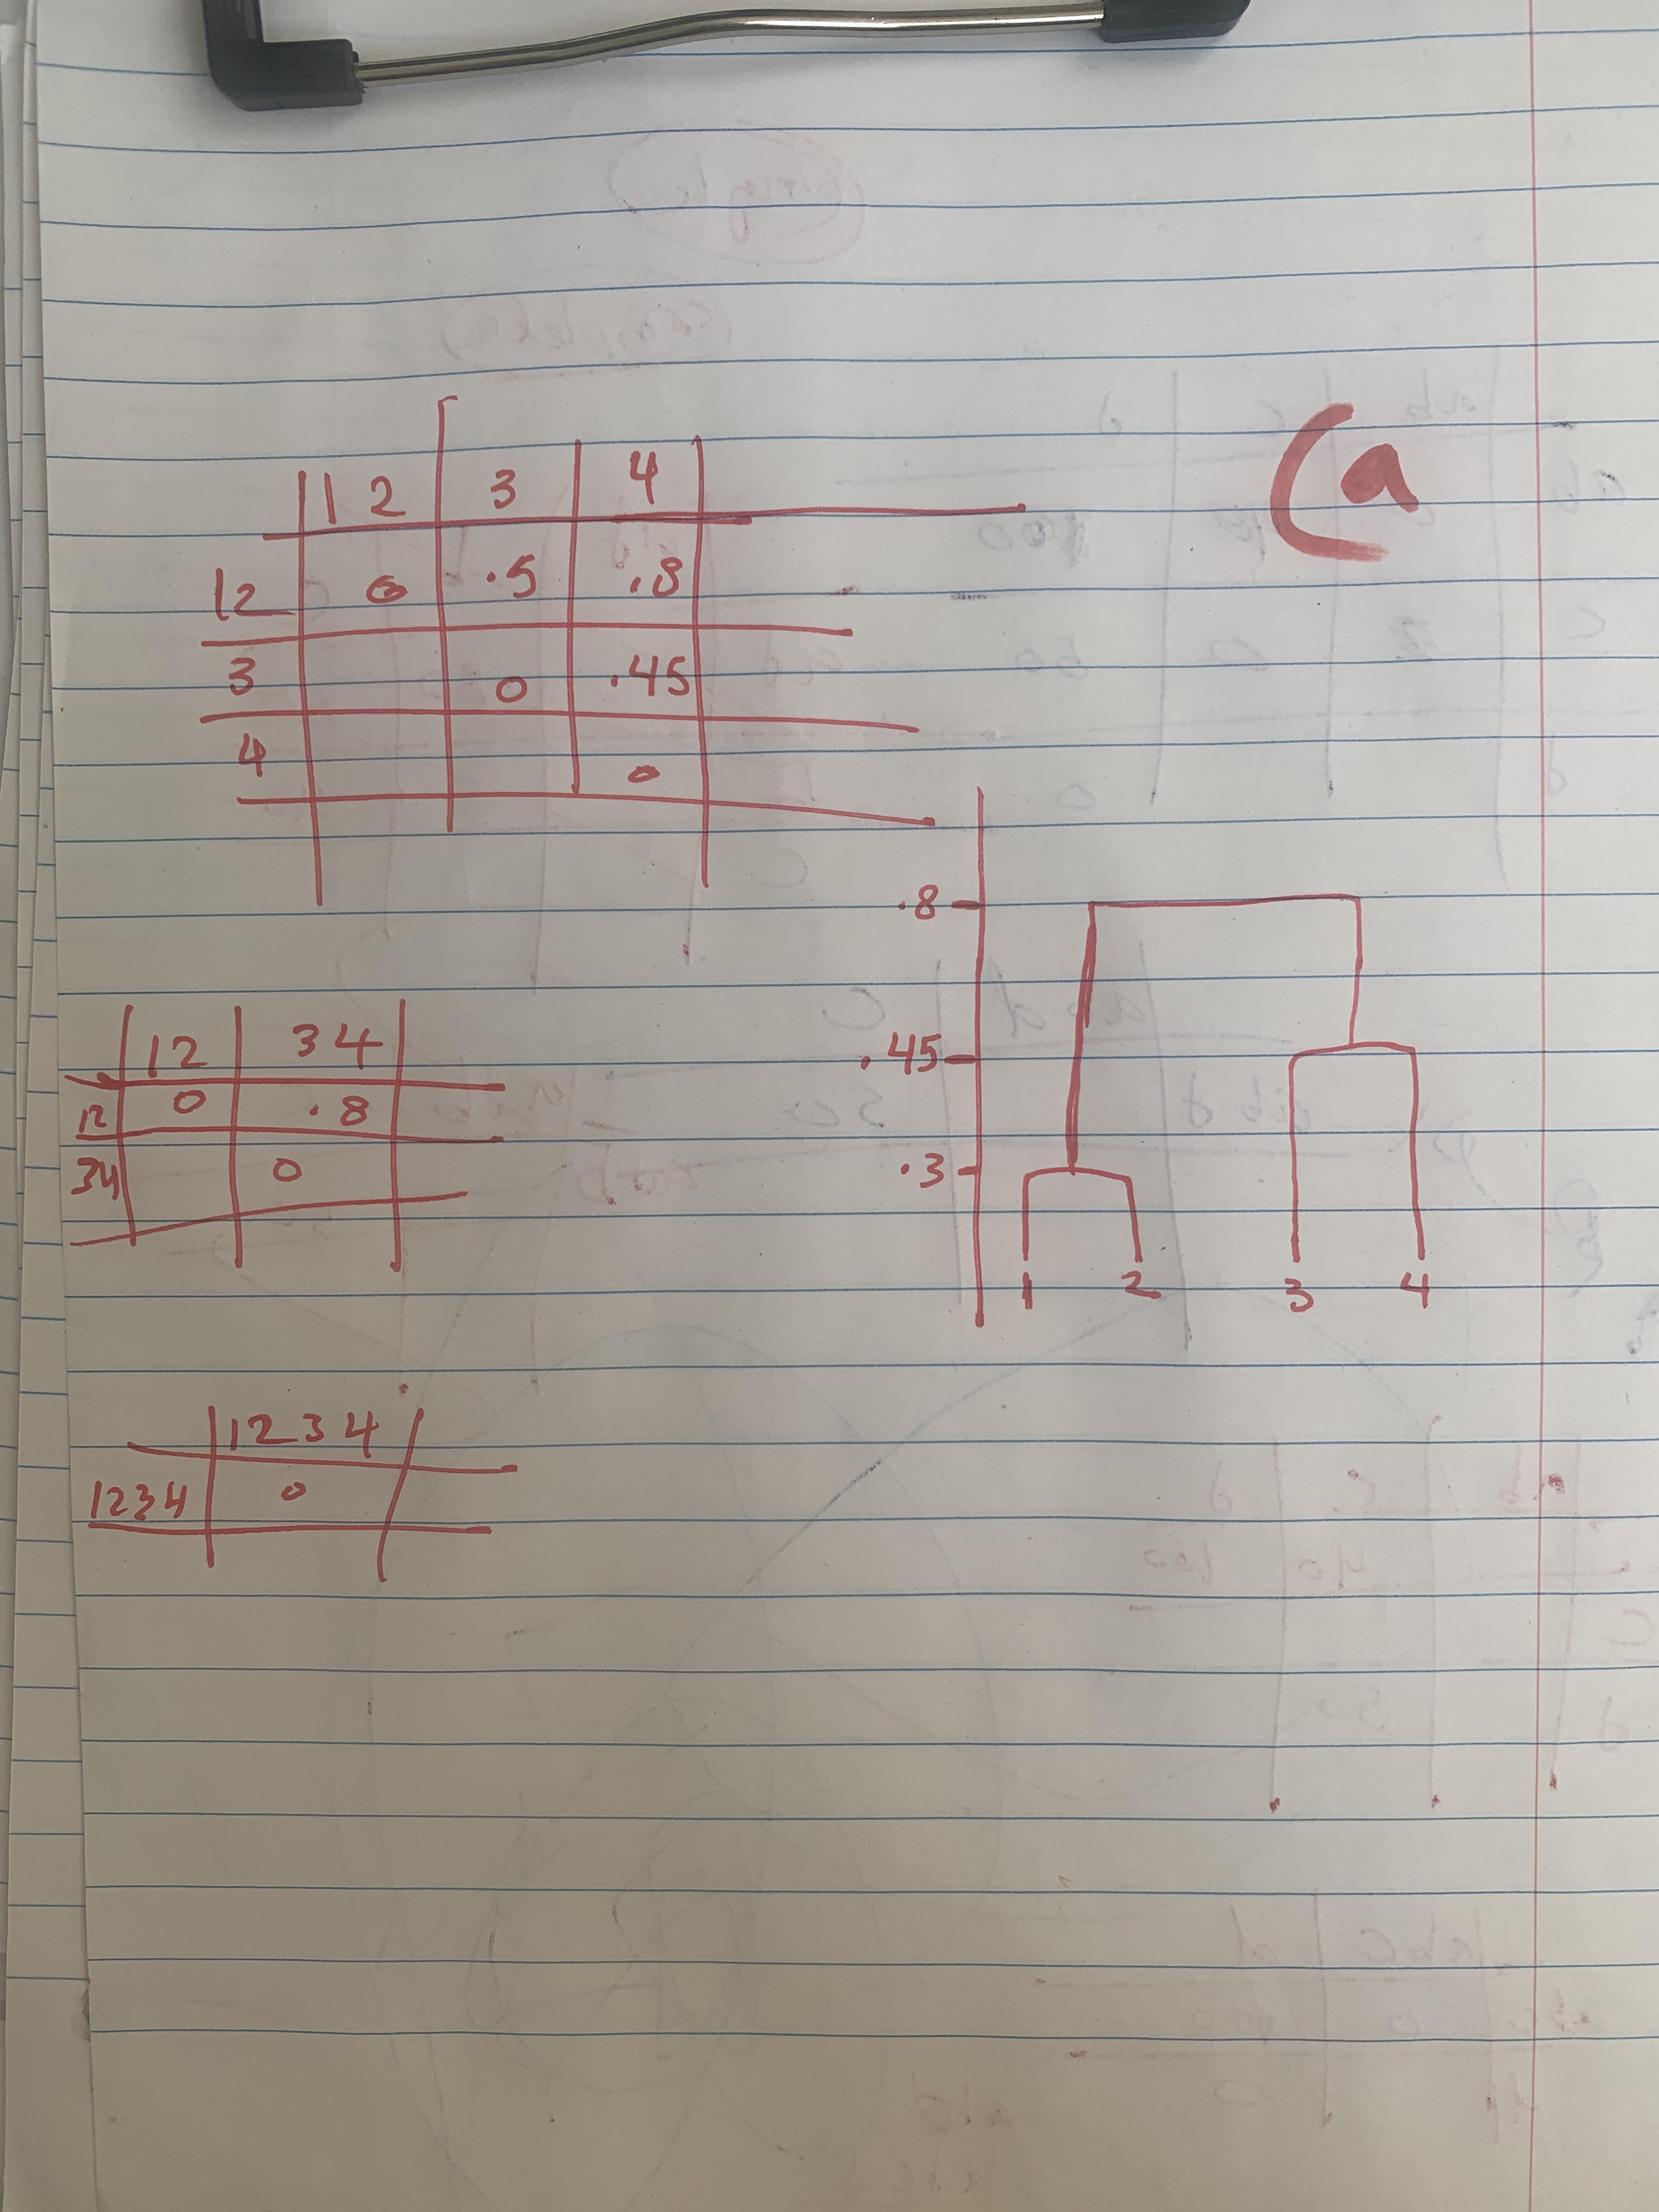

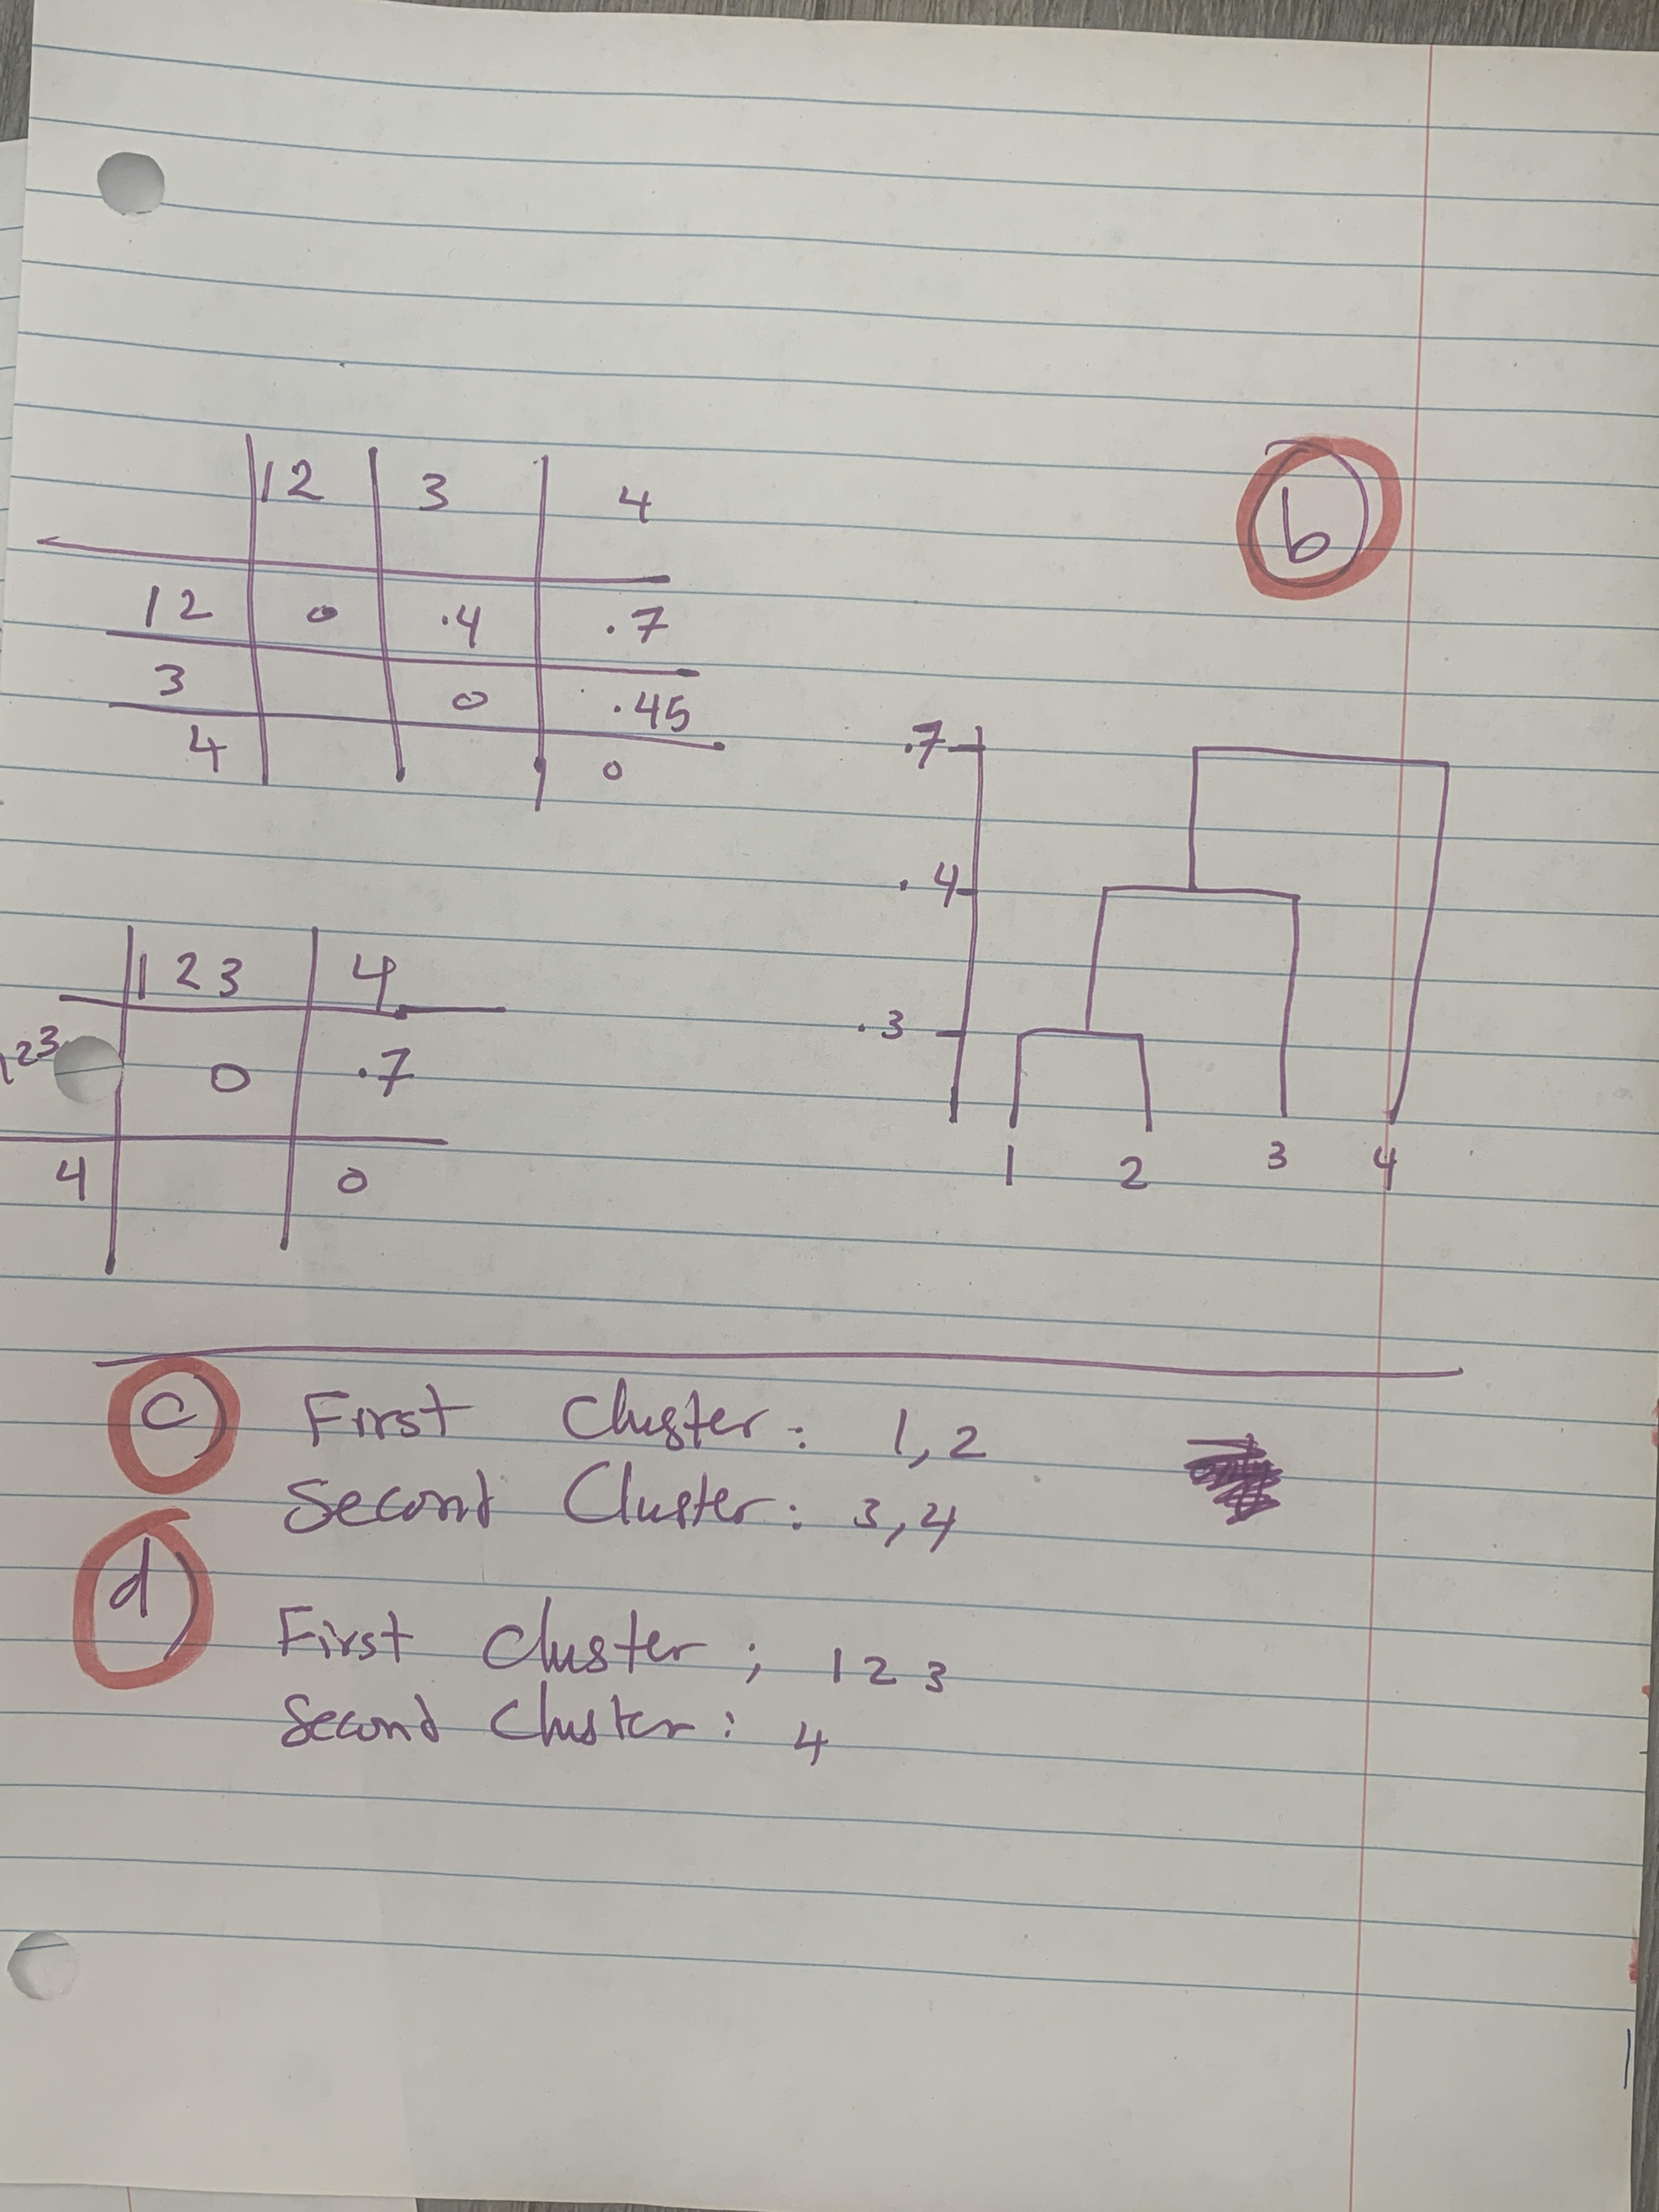

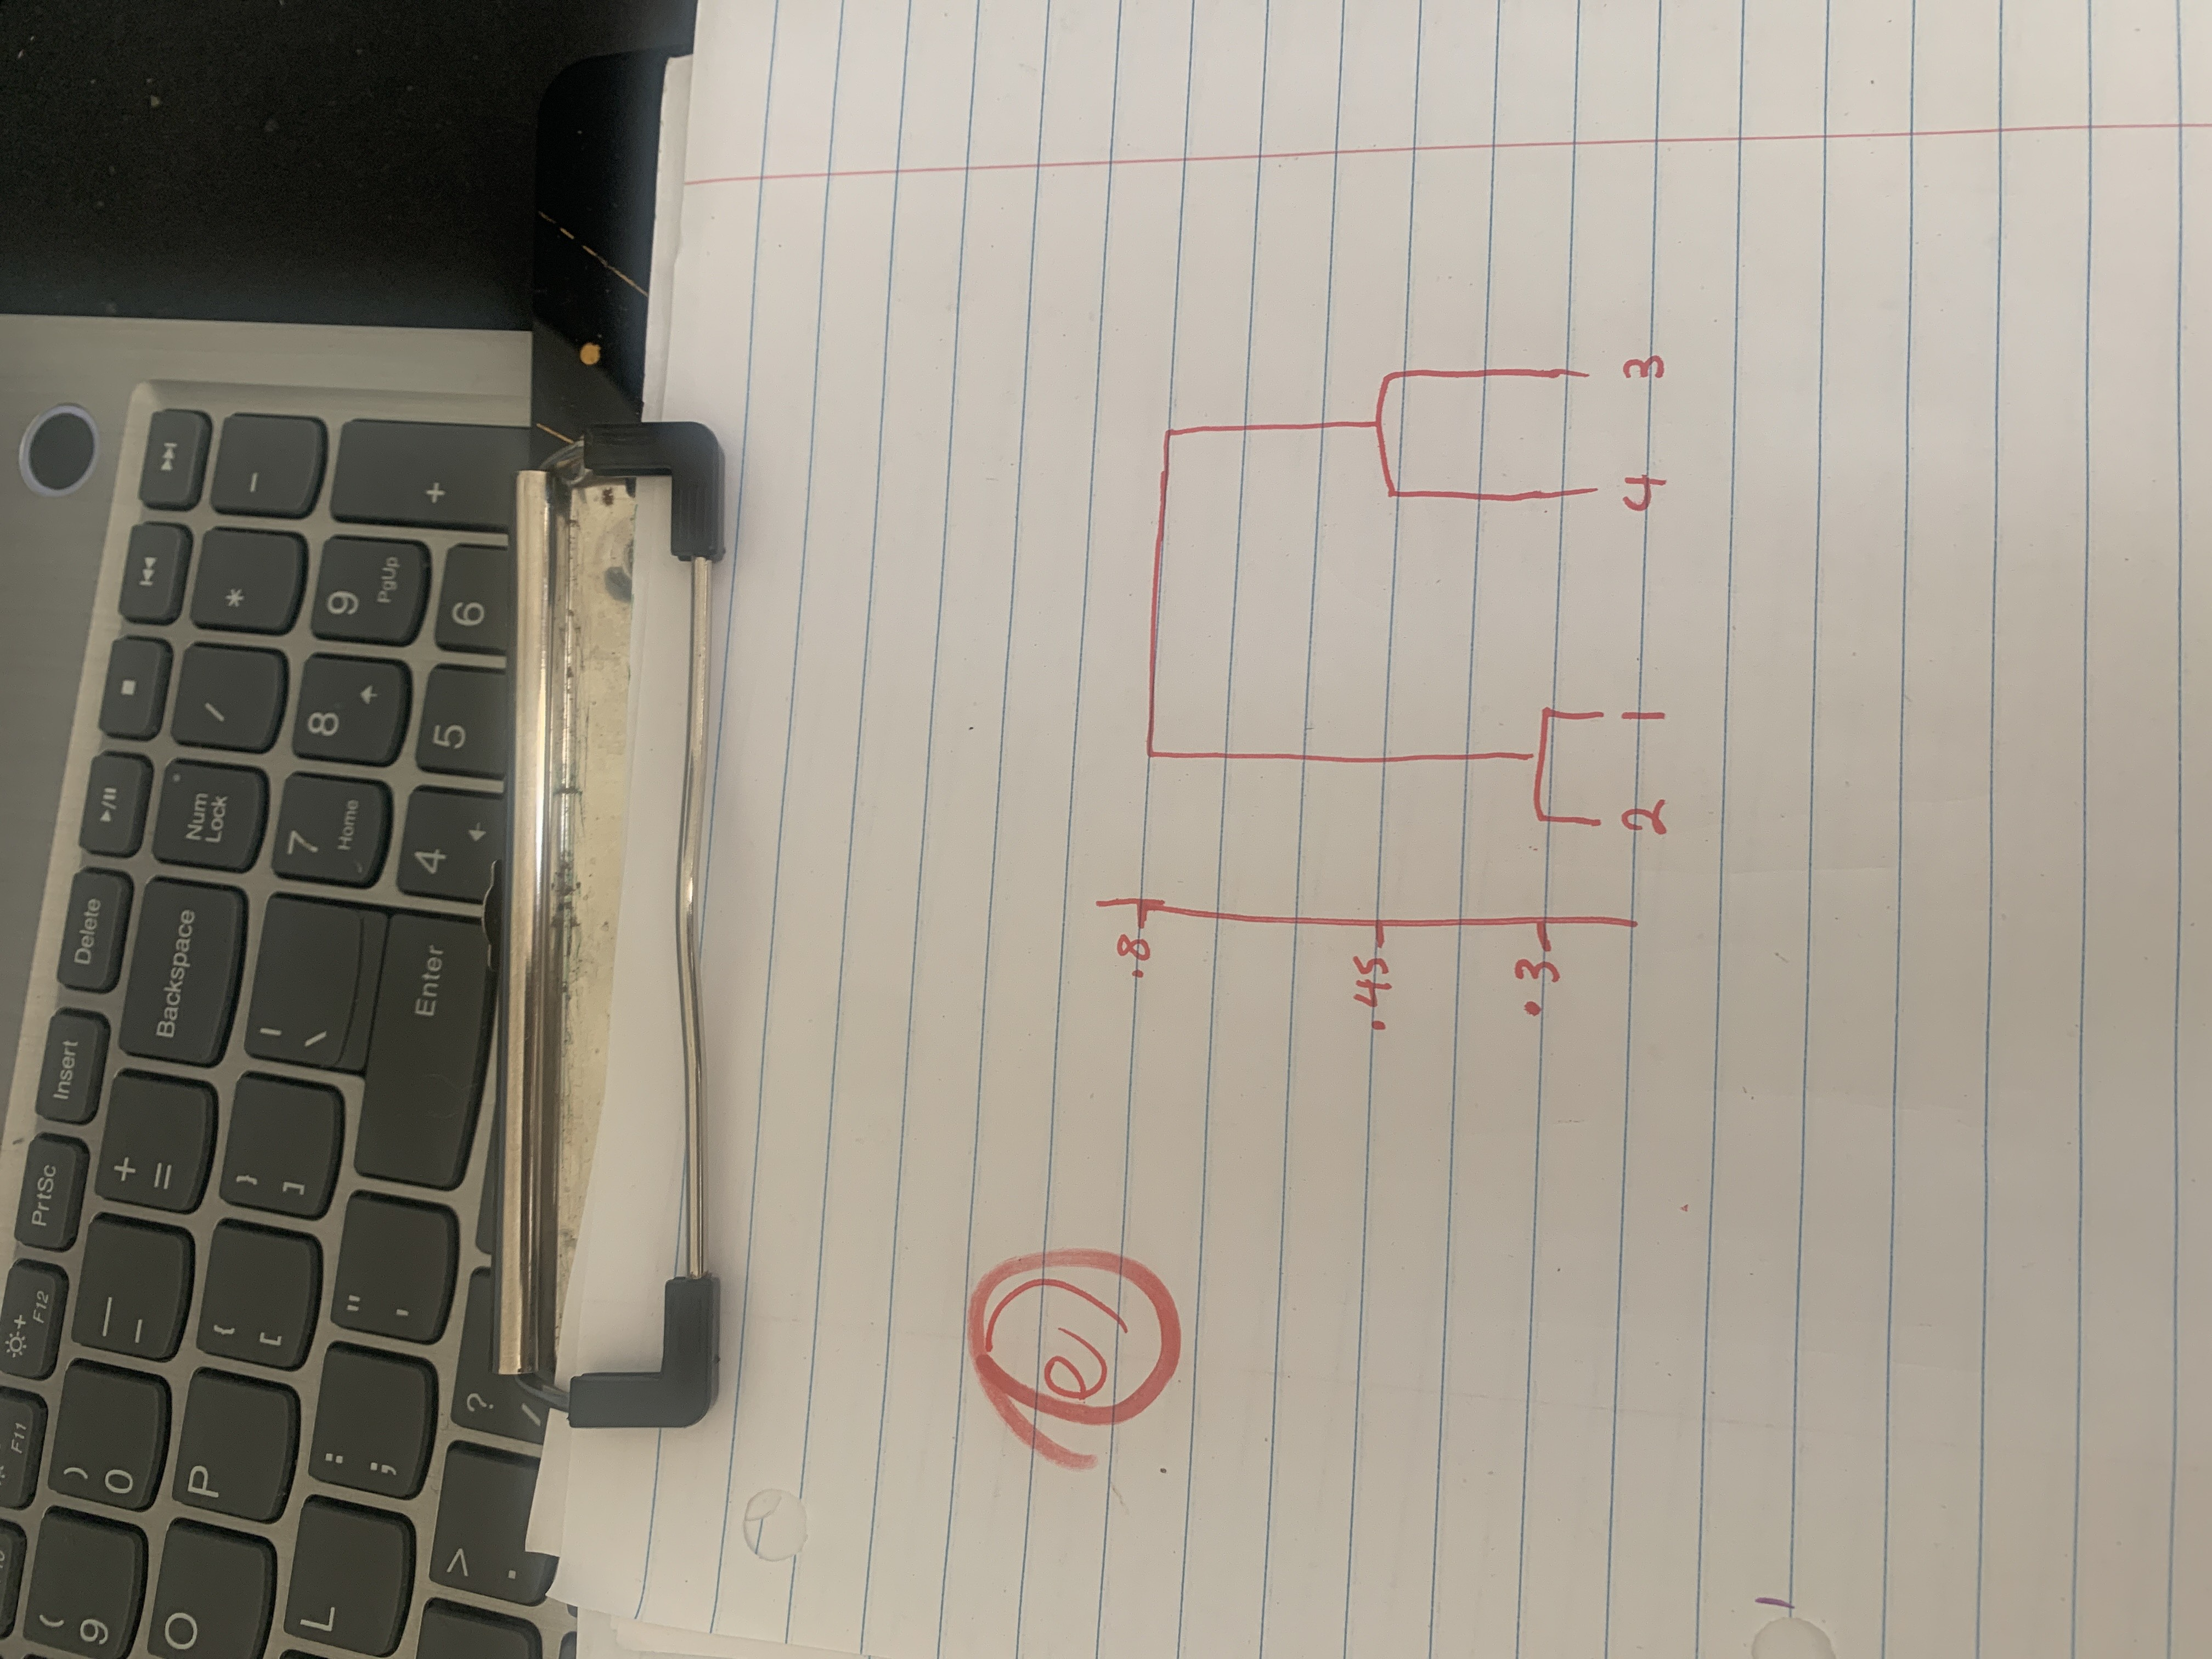

In [362]:
# !pip freeze > requirements.txt